# EASTD143A: Digitalizing old materials with OCR
Date: 2023-03-23 15:45

Instructor: Kwok-leong Tang


## Install Tesseract OCR
Tesseract OCR documentation: https://tesseract-ocr.github.io/

Open your terminal, paste the following command:

sudo apt-get update && sudo apt-get install tesseract-ocr && sudo apt-get install -y tesseract-ocr-eng tesseract-ocr-chi-sim tesseract-ocr-jpn tesseract-ocr-kor
`


## Install the required Python libraries:

pytesseract documentation: https://github.com/madmaze/pytesseract
opencv documentation: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html


In [9]:
!pip install opencv-python-headless
!pip install pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 MB 21.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python -m pip install --upgrade pip


In [11]:
# import cv2 and pytesseract

import cv2
import pytesseract

In [4]:
# import matplotlib & pandas
# for matplotlib documentation: https://matplotlib.org/stable/users/index.html
# for pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html

import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# read the image by using cv2.imread()

image = cv2.imread(
    '/workspaces/eastd143b-ocr/data/images/1c_1l_01.png')


In [11]:
# set the langauge variable
# for multiple languages use + sign, e.g. lang = 'eng+chi_tra+chi_sim'

lang = 'eng' 

In [13]:
# extract the text and put it in a variable

extracted_text = pytesseract.image_to_string(image, lang=lang)

In [16]:
# print the text

print(extracted_text)

 

PREFACE TO FIRST EDITION.

‘This Handbook is not meant to be a guide to the Treaties governing
Customs practice. It is meant merely as a guide to the present practice of
the Shanghai Customs. ‘Its first object is to tell a merchant who wishes to

 

pass goods through the Customs, or transact any other Customs busi
exactly what he has todo. But as the Handbook is also intended for the use
of members of the Customs Service, some of the information given is of
little interest to merchants.

Although the Shanghai Office has used every effort to make the Hand-
book authoritative, it cannot be absolutely guaranteed to be so in ever}
that may arise, and changes also in practice will inevitab
to time. It should therefore only be accepted by the public as a guide,
though it

All changes of office practice at Shanghai, that seriously affect mer-
chants, are published in Customs Notifications. If, when such a Notifica-
tion is issued, the owner of this Handbook will make the nece:

nes

 

 


In [9]:
image2 = '/workspaces/eastd143b-ocr/data/images/2r_2l_01.jpg'

In [16]:
lang2 = 'eng+chi_tra'

In [17]:
extracted_text2 = pytesseract.image_to_string(image2, lang=lang2)

In [18]:
print(extracted_text2)

a.
» wm Fe HW KR he = Bw Tt RF UK
5; eH H m . KR & & H B HR &
S * H A MB HK &K x Be Mw BK €
xy”A & K wR HR ew KR RK HB BH RM
yo @ = EF KR tt fF WwW KR EE w Kh A
t 2 # fe Rs Rew te ee
nM Te # Re we et RR kh MM.
mem H £ & A gp A he BH Bl tt
Ak # ot Uke FA e 2B
a6 1 KH RM bk RH bh x + SM
fi & HR #£# Rk Ho % Z we bl Bl
A» Bw Rm KR i We 2 Zz
+R hr BAW € aoe to i ®
a ok HS me RM OM Ee Af et BR
me fr th OH wwe hk S fe & fh ho TF
1 oF ye fe. Al Se it Kk, Hl ow Gh Om
@ Ww Hk ff 4 HF Il te fh He
me w RW RH 3 Ww rR mM €& MW
aii & 0 f& E& BA fe Pr # at
mw me ue kk mM fk 2 #£ tf BR
im Be mo Oe Om x
Too ff sO L. oO =
m om 2 8 & - FR mh ke WT

 

The survey lines shall be open to revision by the Ministry of Posts and
Communications.

The Chinsse Jmperial Government undertakes to call in, after having received
from the Banks application in writing to do so, the aforesaid Gold Bonds, and the
Banks will apply the amount necessary for the said redemption out of the proceeds
of the Loan and will deliver t

In [22]:
def draw_boxes(image, boxes, color, thickness):
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    return image

In [24]:
def plot_characters(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    original_image = image.copy()

    # Set the language for OCR (e.g., 'chi_sim' for simplified Chinese, 'jpn' for Japanese, 'kor' for Korean)
    lang = "eng"

    # Perform OCR using Tesseract
    extracted_text = pytesseract.image_to_string(image, lang=lang)

    # Get character/word bounding boxes
    boxes = pytesseract.image_to_boxes(image, lang=lang)
    box_list = []

    for b in boxes.splitlines():
        elements = b.split()
        x, y, w, h = int(elements[1]), int(
            elements[2]), int(elements[3]), int(elements[4])
        box_list.append((x, image.shape[0] - y, w - x, y - h))

    # Draw green boxes around each detected character/word
    boxed_image = draw_boxes(original_image, box_list,
                             color=(0, 255, 0), thickness=2)

    # Convert the boxed_image from BGR to RGB
    boxed_image_rgb = cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB)

    # Display the boxed image using pyplot
    plt.figure(figsize=(16, 10))
    plt.imshow(boxed_image_rgb)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

    # Print the extracted text
    print("Extracted Text:")
    print(extracted_text)


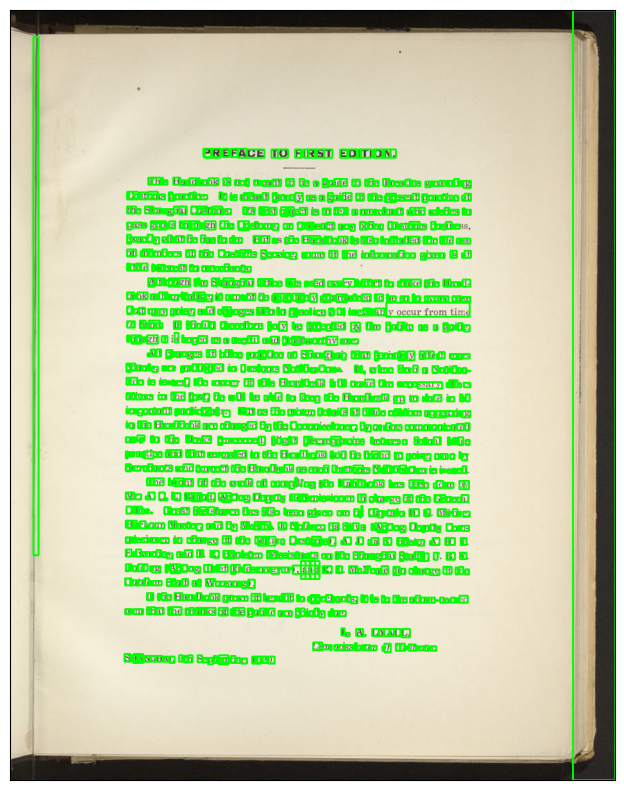

Extracted Text:
 

PREFACE TO FIRST EDITION.

‘This Handbook is not meant to be a guide to the Treaties governing
Customs practice. It is meant merely as a guide to the present practice of
the Shanghai Customs. ‘Its first object is to tell a merchant who wishes to

 

pass goods through the Customs, or transact any other Customs busi
exactly what he has todo. But as the Handbook is also intended for the use
of members of the Customs Service, some of the information given is of
little interest to merchants.

Although the Shanghai Office has used every effort to make the Hand-
book authoritative, it cannot be absolutely guaranteed to be so in ever}
that may arise, and changes also in practice will inevitab
to time. It should therefore only be accepted by the public as a guide,
though it

All changes of office practice at Shanghai, that seriously affect mer-
chants, are published in Customs Notifications. If, when such a Notifica-
tion is issued, the owner of this Handbook will make the n

In [26]:
plot_characters('/workspaces/eastd143b-ocr/data/images/1c_1l_01.png')

In [ ]:
def confindence_rate(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Set the language for OCR (e.g., 'chi_sim' for simplified Chinese, 'jpn' for Japanese, 'kor' for Korean)
    lang = "eng"

    # Perform OCR using Tesseract and obtain character data
    data = pytesseract.image_to_data(
        image, lang=lang, output_type=pytesseract.Output.DATAFRAME)

    # Filter out rows with empty text
    data = data[data['text'].notnull()]

    # Iterate through each row and print the character along with its confidence level
    for index, row in data.iterrows():
        char = row['text']
        conf = row['conf']
        print(f"Character: {char}, Confidence: {conf}")


In [ ]:
confindence_rate('/workspaces/eastd143a-ocr/data/images/1c_1l_01.png')